In [98]:
import numpy as np
import pandas as pd

In [99]:
data = pd.read_csv(r"C:\Users\parix\Projects\Github\Sales Prediction\Dataset.csv")

In [100]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [101]:
data.shape

(8523, 12)

In [102]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [104]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [105]:
data['Item_Weight'].mean()

12.857645184136183

In [106]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

In [107]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [108]:
data['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [109]:
mode_outlet_size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=lambda x: x.mode()[0])

In [110]:
print(mode_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [111]:
missing_val = data['Outlet_Size'].isnull()

In [112]:
missing_val

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [113]:
data.loc[missing_val, 'Outlet_Size'] = data.loc[missing_val, 'Outlet_Type'].apply(
    lambda x: mode_outlet_size.loc['Outlet_Size', x]
    if x in mode_outlet_size.columns else 'Unknown')

In [114]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [115]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
import warnings
warnings.filterwarnings("ignore")

In [118]:
sns.set()

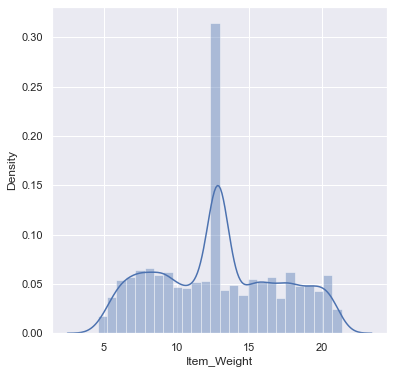

In [119]:
plt.figure(figsize = (6,6))
sns.distplot(data['Item_Weight'])
plt.show()

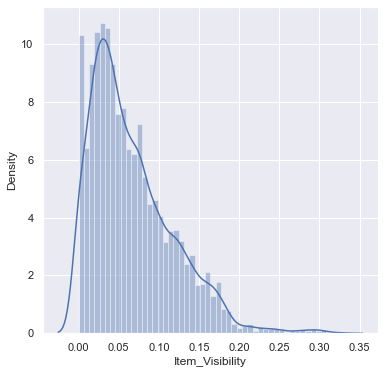

In [120]:
plt.figure(figsize = (6,6))
sns.distplot(data['Item_Visibility'])
plt.show()

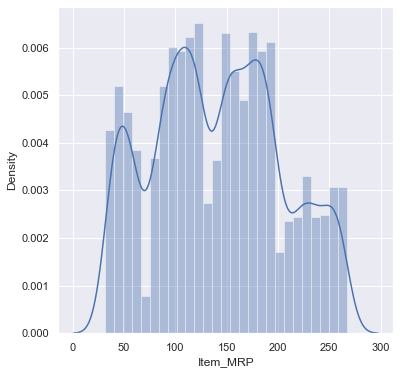

In [121]:
plt.figure(figsize = (6,6))
sns.distplot(data['Item_MRP'])
plt.show()

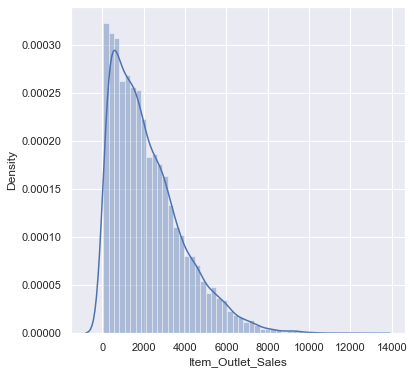

In [122]:
plt.figure(figsize = (6,6))
sns.distplot(data['Item_Outlet_Sales'])
plt.show()

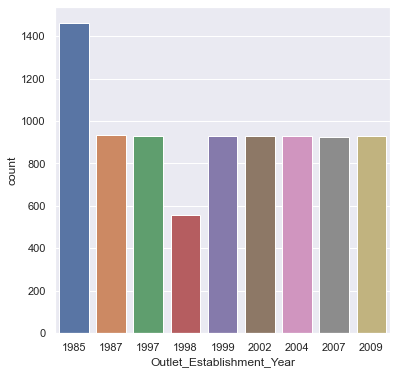

In [123]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Establishment_Year', data = data)
plt.show()

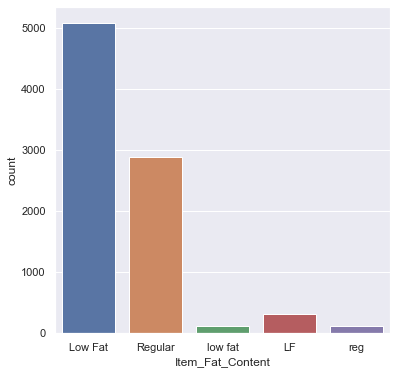

In [124]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Item_Fat_Content', data = data)
plt.show()

In [125]:
data['Item_Fat_Content'].value_counts(dropna = False)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [126]:
data.replace({'Item_Fat_Content': {'low fat':'Low Fat', 'LF':'Low Fat','reg':'Regular'}}, inplace = True)

In [127]:
data['Item_Fat_Content'].value_counts(dropna = False)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

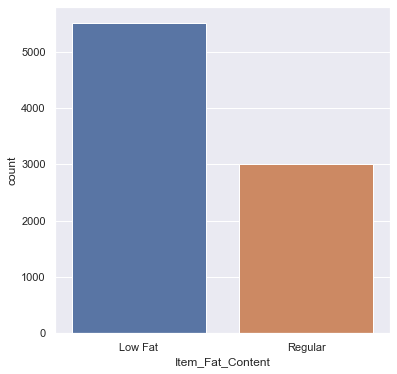

In [128]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Item_Fat_Content', data = data)
plt.show()

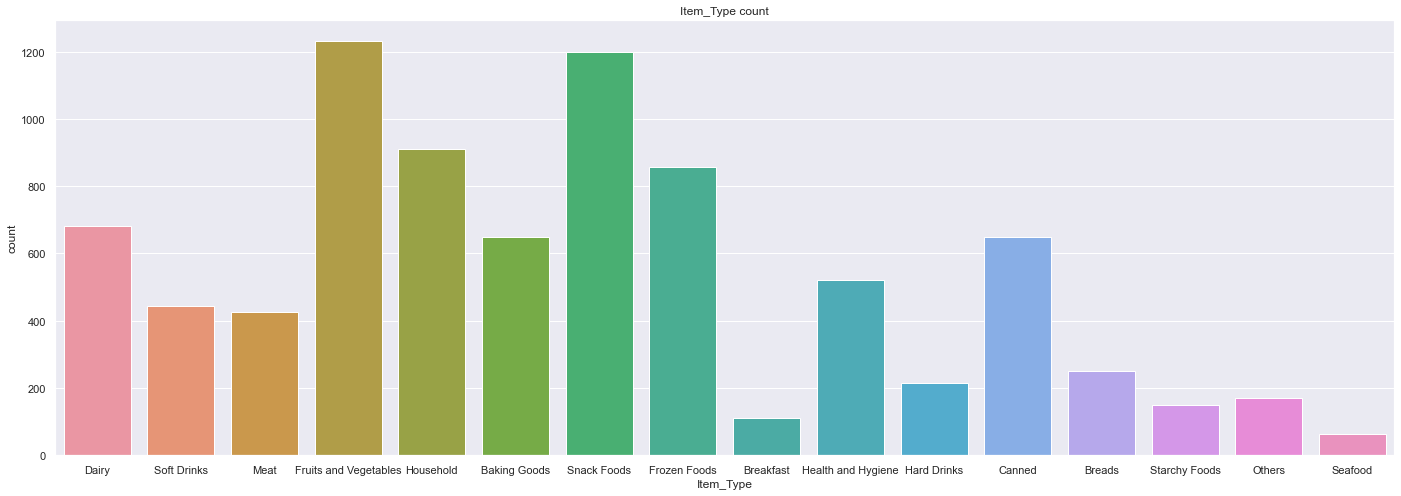

In [129]:
plt.figure(figsize = (24, 8))
sns.countplot(x = 'Item_Type', data = data)
plt.title('Item_Type count')
plt.show()

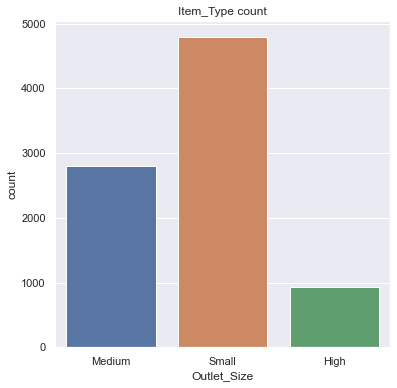

In [130]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Size', data = data)
plt.title('Item_Type count')
plt.show()

In [131]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
encoder = LabelEncoder()

In [134]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])

data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])

data['Item_Type'] = encoder.fit_transform(data['Item_Type'])

data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])

data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])

data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

In [135]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [136]:
x = data.drop(columns = 'Item_Outlet_Sales', axis = 1)
y = data['Item_Outlet_Sales']

In [137]:
print(x)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [138]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [139]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [141]:
print(x.shape, x_train.shape, x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [142]:
model = XGBRegressor()

In [143]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [144]:
train_pred = model.predict(x_train)

In [145]:
from sklearn import metrics  

In [146]:
r2_train = metrics.r2_score(y_train, train_pred)

In [147]:
print('R Squared value:', r2_train)

R Squared value: 0.8639680373364909


In [148]:
test_pred = model.predict(x_test)

In [149]:
r2_test = metrics.r2_score(y_test, test_pred)

In [150]:
print(('R Squared value:', r2_test))

('R Squared value:', 0.5233136709735687)


In [151]:
model = XGBRegressor(
    reg_alpha=0.1,
    reg_lambda=1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)


In [152]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [153]:
train_pred = model.predict(x_train)

In [154]:
r2_train = metrics.r2_score(y_train, train_pred)

In [155]:
print('R Squared value:', r2_train)

R Squared value: 0.6625764024732792


In [156]:
test_pred = model.predict(x_test)

In [157]:
r2_test = metrics.r2_score(y_test, test_pred)

In [158]:
print(('R Squared value:', r2_test))

('R Squared value:', 0.584514176424476)
